In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import uniform
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('adult_cleaned_final.csv')

In [3]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K


In [4]:
X = data.drop('income', axis=1)

In [5]:
X.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States


In [6]:
y = data['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [7]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: income, dtype: int64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
numerical_features = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

In [10]:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [11]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [12]:
initial_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='rbf'))
])

In [13]:
initial_clf.fit(X_train, y_train)
y_pred_initial = initial_clf.predict(X_test)
print("Inicijalna preciznost:", accuracy_score(y_test, y_pred_initial))

Inicijalna preciznost: 0.8453721075672295


In [14]:
param_grid = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
}

In [15]:
grid_search = GridSearchCV(initial_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'fnlwgt',
                                                                          'educational-num',
                                                                          'capital-gain',
                                                                          'capital-loss',
                                                                          'hours-per-week']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['workclass',
                                                                          'education',
                                                                          'marital-status',
                                                                          'occupation',
                                                                          'relationship',
                                                                          'race',
                                                                          'gender',
                                                                          'native-country'])])),
                                       ('classifier', SVC())]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.1, 1, 10, 100],
                         'classifier__gamma': ['scale', 'auto', 0.001, 0.01,
                                               0.1, 1]},
             scoring='accuracy')

In [16]:
best_clf_from_grid = grid_search.best_estimator_
y_pred_grid = best_clf_from_grid.predict(X_test)

In [17]:
print("Najbolji parametri iz Grid Search-a:", grid_search.best_params_)

Najbolji parametri iz Grid Search-a: {'classifier__C': 1, 'classifier__gamma': 'scale'}


In [18]:
print("Preciznost nakon Grid Search-a:", accuracy_score(y_test, y_pred_grid))

Preciznost nakon Grid Search-a: 0.8453721075672295


In [19]:
param_dist = {
    'classifier__C': uniform(0.1, 100),
    'classifier__gamma': ['scale', 'auto'] + list(uniform(0.001, 1).rvs(10))
}

In [20]:
random_search = RandomizedSearchCV(initial_clf, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               StandardScaler(),
                                                                               ['age',
                                                                                'fnlwgt',
                                                                                'educational-num',
                                                                                'capital-gain',
                                                                                'capital-loss',
                                                                                'hours-per-week']),
                                                                              ('cat',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['workclass',
                                                                                'education',
                                                                                'marital-status',
                                                                                'occupation',
                                                                                'relationship',
                                                                                'race',
                                                                                'gender',
                                                                                'native-count...
                   param_distributions={'classifier__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000240D5315EA0>,
                                        'classifier__gamma': ['scale', 'auto',
                                                              0.9461213677492307,
                                                              0.4322159295114205,
                                                              0.9686072671886793,
                                                              0.9501607673278877,
                                                              0.03529446368361289,
                                                              0.5451954478397264,
                                                              0.9107944482037599,
                                                              0.7774523207520188,
                                                              0.06450025916751723,
                                                              0.03620840995771679]},
                   scoring='accuracy')

In [21]:
best_clf_from_random = random_search.best_estimator_
y_pred_random = best_clf_from_random.predict(X_test)

In [22]:
print("Najbolji parametri iz Randomized Search-a:", random_search.best_params_)

Najbolji parametri iz Randomized Search-a: {'classifier__C': 1.5227581792019662, 'classifier__gamma': 0.06450025916751723}


In [23]:
print("Preciznost nakon Randomized Search-a:", accuracy_score(y_test, y_pred_random))

Preciznost nakon Randomized Search-a: 0.8469355847404628


In [24]:
initial_best = [1.5227581792019662, 0.06450025916751723]

In [26]:
def objective_function(params):
    C, gamma = params
    initial_clf.set_params(classifier__C=C, classifier__gamma=gamma)
    initial_clf.fit(X_train, y_train)
    y_pred = initial_clf.predict(X_test)
    return accuracy_score(y_test, y_pred)

In [48]:
def pso(n_particles, iterations, w, c1, c2, lb, ub, initial_best):
    dim = 2
    X = np.random.uniform(lb, ub, (n_particles, dim))
    X[0] = initial_best
    V = np.random.uniform(-1, 1, (n_particles, dim))
    pbest = X.copy()
    pbest_scores = np.array([objective_function(ind) for ind in X])
    gbest = X[np.argmax(pbest_scores)]
    gbest_score = np.max(pbest_scores)

    history = []

    for t in range(iterations):
        for i in range(n_particles):
            r1, r2 = np.random.rand(), np.random.rand()
            V[i] = w * V[i] + c1 * r1 * (pbest[i] - X[i]) + c2 * r2 * (gbest - X[i])
            X[i] = np.clip(X[i] + V[i], lb, ub)

            score = objective_function(X[i])
            if score > pbest_scores[i]:
                pbest[i] = X[i]
                pbest_scores[i] = score
                if score > gbest_score:
                    gbest = X[i]
                    gbest_score = score

        print(f"PSO Iteracija: {t+1}")
        history.append(gbest_score)

    return gbest, gbest_score, history

In [47]:
n_particles = 10
iterations = 30
w = 0.5
c1 = 1.5
c2 = 1.5
lb = [max(0.1, initial_best[0] - 1), max(0.001, initial_best[1] - 0.01)]
ub = [initial_best[0] + 1, initial_best[1] + 0.01]

In [49]:
best_params_pso, best_score_pso, history_pso = pso(n_particles, iterations, w, c1, c2, lb, ub, initial_best)

PSO Iteracija: 1
PSO Iteracija: 2
PSO Iteracija: 3
PSO Iteracija: 4
PSO Iteracija: 5
PSO Iteracija: 6
PSO Iteracija: 7
PSO Iteracija: 8
PSO Iteracija: 9
PSO Iteracija: 10
PSO Iteracija: 11
PSO Iteracija: 12
PSO Iteracija: 13
PSO Iteracija: 14
PSO Iteracija: 15
PSO Iteracija: 16
PSO Iteracija: 17
PSO Iteracija: 18
PSO Iteracija: 19
PSO Iteracija: 20
PSO Iteracija: 21
PSO Iteracija: 22
PSO Iteracija: 23
PSO Iteracija: 24
PSO Iteracija: 25
PSO Iteracija: 26
PSO Iteracija: 27
PSO Iteracija: 28
PSO Iteracija: 29
PSO Iteracija: 30
PSO najbolje parametre: C = 2.0013330547218775, gamma = 0.0720557402455505
PSO najbolji rezultat: 0.8492808005003127


In [50]:
print(f"PSO najbolje parametre: C = {best_params_pso[0]}, gamma = {best_params_pso[1]}")
print(f"PSO najbolji rezultat: {best_score_pso}")

PSO najbolje parametre: C = 2.0013330547218775, gamma = 0.0720557402455505
PSO najbolji rezultat: 0.8492808005003127


In [68]:
def ga(pop_size, generations, lb, ub, mutation_rate, initial_best):
    dim = 2

    def create_individual():
        return np.random.uniform(lb, ub, dim)

    def mutate(individual):
        if np.random.rand() < mutation_rate:
            mutation_idx = np.random.randint(0, dim)
            individual[mutation_idx] = np.random.uniform(lb[mutation_idx], ub[mutation_idx])
        return individual

    def crossover(parent1, parent2):
        crossover_idx = np.random.randint(0, dim)
        child1 = np.concatenate([parent1[:crossover_idx], parent2[crossover_idx:]])
        child2 = np.concatenate([parent2[:crossover_idx], parent1[crossover_idx:]])
        return child1, child2

    population = np.array([create_individual() for _ in range(pop_size)])
    population[0] = initial_best
    scores = np.array([objective_function(ind) for ind in population])

    history = []

    for gen in range(generations):
        new_population = []
        for _ in range(pop_size // 2):
            parents = population[np.argsort(-scores)[:2]]
            child1, child2 = crossover(parents[0], parents[1])
            new_population.extend([mutate(child1), mutate(child2)])

        population = np.array(new_population)
        scores = np.array([objective_function(ind) for ind in population])

        print(f"GA Iteracija: {gen+1}")
        best_idx = np.argmax(scores)
        best_individual = population[best_idx]
        best_score = scores[best_idx]
        history.append(best_score)

    return best_individual, best_score, history

In [69]:
pop_size = 10
generations = 30
mutation_rate = 0.1

In [70]:
best_params_ga, best_score_ga, history_ga = ga(pop_size, generations, lb, ub, mutation_rate, initial_best)

GA Iteracija: 1
GA Iteracija: 2
GA Iteracija: 3
GA Iteracija: 4
GA Iteracija: 5
GA Iteracija: 6
GA Iteracija: 7
GA Iteracija: 8
GA Iteracija: 9
GA Iteracija: 10
GA Iteracija: 11
GA Iteracija: 12
GA Iteracija: 13
GA Iteracija: 14
GA Iteracija: 15
GA Iteracija: 16
GA Iteracija: 17
GA Iteracija: 18
GA Iteracija: 19
GA Iteracija: 20
GA Iteracija: 21
GA Iteracija: 22
GA Iteracija: 23
GA Iteracija: 24
GA Iteracija: 25
GA Iteracija: 26
GA Iteracija: 27
GA Iteracija: 28
GA Iteracija: 29
GA Iteracija: 30


In [71]:
print(f"GA najbolje parametre: C = {best_params_ga[0]}, gamma = {best_params_ga[1]}")
print(f"GA najbolji rezultat: {best_score_ga}")

GA najbolje parametre: C = 2.2288497435186647, gamma = 0.06727113434760187
GA najbolji rezultat: 0.8491244527829893


In [63]:
def bat_algorithm(n_bats, iterations, lb, ub, pulse_freq, loudness, pulse_rate, alpha, gamma, initial_best):
    dim = 2
    Qmin, Qmax = pulse_freq
    Q = np.zeros(n_bats)
    V = np.zeros((n_bats, dim))
    X = np.random.uniform(lb, ub, (n_bats, dim))
    X[0] = initial_best
    fitness = np.array([objective_function(ind) for ind in X])
    best_bat = X[np.argmax(fitness)]
    best_fitness = np.max(fitness)

    history = []

    for t in range(iterations):
        for i in range(n_bats):
            Q[i] = Qmin + (Qmax - Qmin) * np.random.rand()
            V[i] += (X[i] - best_bat) * Q[i]
            X[i] = np.clip(X[i] + V[i], lb, ub)

            if np.random.rand() > pulse_rate:
                X[i] = np.clip(best_bat + 0.001 * np.random.randn(dim), lb, ub)

            if np.random.rand() < loudness and objective_function(X[i]) > fitness[i]:
                fitness[i] = objective_function(X[i])
                if fitness[i] > best_fitness:
                    best_bat = X[i]
                    best_fitness = fitness[i]

        print(f"BAT Iteracija: {t+1}")
        history.append(best_fitness)

        loudness *= alpha
        pulse_rate *= (1 - np.exp(-gamma * t))

    return best_bat, best_fitness, history

In [64]:
n_bats = 10
iterations = 30
pulse_freq = [0, 2]
loudness = 0.5
pulse_rate = 0.5
alpha = 0.9
gamma = 0.9

In [65]:
best_params_bat, best_score_bat, history_bat = bat_algorithm(n_bats, iterations, lb, ub, pulse_freq, loudness, pulse_rate, alpha, gamma, initial_best)

BAT Iteracija: 1
BAT Iteracija: 2
BAT Iteracija: 3
BAT Iteracija: 4
BAT Iteracija: 5
BAT Iteracija: 6
BAT Iteracija: 7
BAT Iteracija: 8
BAT Iteracija: 9
BAT Iteracija: 10
BAT Iteracija: 11
BAT Iteracija: 12
BAT Iteracija: 13
BAT Iteracija: 14
BAT Iteracija: 15
BAT Iteracija: 16
BAT Iteracija: 17
BAT Iteracija: 18
BAT Iteracija: 19
BAT Iteracija: 20
BAT Iteracija: 21
BAT Iteracija: 22
BAT Iteracija: 23
BAT Iteracija: 24
BAT Iteracija: 25
BAT Iteracija: 26
BAT Iteracija: 27
BAT Iteracija: 28
BAT Iteracija: 29
BAT Iteracija: 30


In [66]:
print(f"BAT najbolje parametre: C = {best_params_bat[0]}, gamma = {best_params_bat[1]}")
print(f"BAT najbolji rezultat: {best_score_bat}")

BAT najbolje parametre: C = 0.5230321156663709, gamma = 0.055145358844770544
BAT najbolji rezultat: 0.8491244527829893


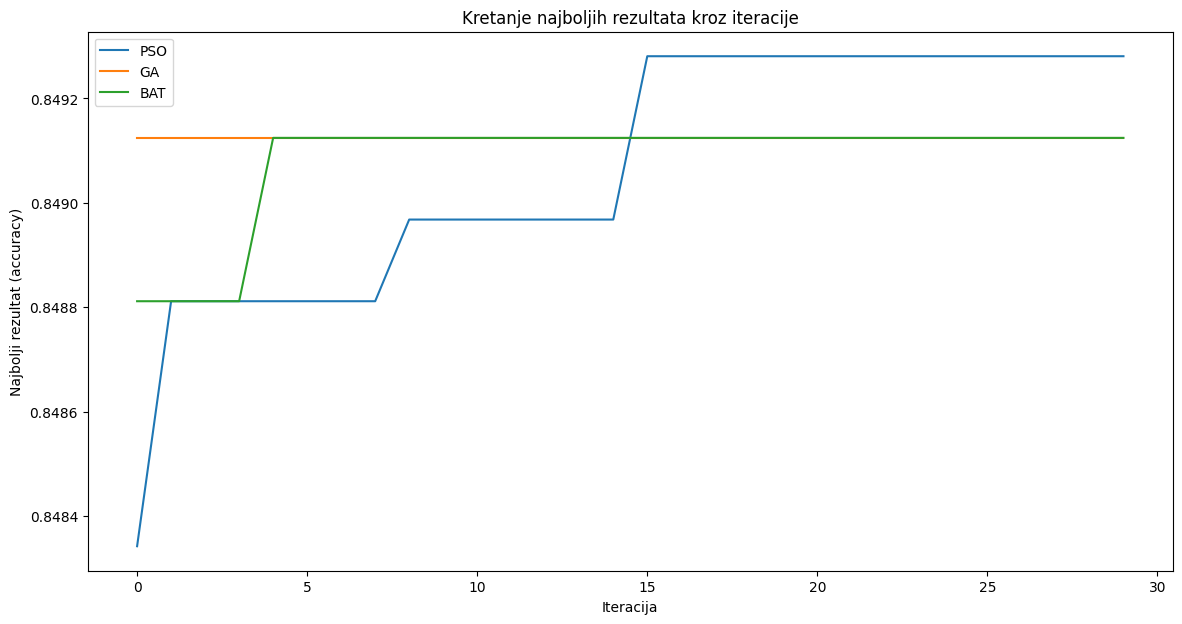

In [72]:
plt.figure(figsize=(14, 7))
plt.plot(history_pso, label='PSO')
plt.plot(history_ga, label='GA')
plt.plot(history_bat, label='BAT')
plt.xlabel('Iteracija')
plt.ylabel('Najbolji rezultat (accuracy)')
plt.title('Kretanje najboljih rezultata kroz iteracije')
plt.legend()
plt.show()